In [ ]:
#mengimport library tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#mendownload data set rockpaperscissors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 16:30:22--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.43MB/s    in 55s     

2021-07-27 16:31:18 (5.55 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstraksi dataset pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#split dataset
!pip install split_folders

In [ ]:
import splitfolders

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors', seed = 1314, ratio = (.6, .4))

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 3193.72 files/s]


In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
#membagi data train 60% dan data validation 40%
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')
 
val_rock = os.path.join(validation_dir, 'rock')
val_scissors = os.path.join(validation_dir, 'scissors')
val_paper = os.path.join(validation_dir, 'paper')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25, 
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =1)

Epoch 1/20
25/25 [==============================] - 44s 2s/step - loss: 1.2166 - accuracy: 0.4087 - val_loss: 0.9841 - val_accuracy: 0.4688
Epoch 2/20
25/25 [==============================] - 43s 2s/step - loss: 0.8797 - accuracy: 0.6162 - val_loss: 0.6956 - val_accuracy: 0.7312
Epoch 3/20
25/25 [==============================] - 43s 2s/step - loss: 0.5659 - accuracy: 0.7850 - val_loss: 0.4982 - val_accuracy: 0.8188
Epoch 4/20
25/25 [==============================] - 43s 2s/step - loss: 0.3766 - accuracy: 0.8600 - val_loss: 0.2336 - val_accuracy: 0.9250
Epoch 5/20
25/25 [==============================] - 43s 2s/step - loss: 0.3338 - accuracy: 0.8850 - val_loss: 0.2510 - val_accuracy: 0.9312
Epoch 6/20
25/25 [==============================] - 43s 2s/step - loss: 0.2912 - accuracy: 0.8988 - val_loss: 0.2448 - val_accuracy: 0.9187
Epoch 7/20
25/25 [==============================] - 43s 2s/step - loss: 0.3327 - accuracy: 0.8800 - val_loss: 0.2357 - val_accuracy: 0.9187
Epoch 8/20
25/25 [==

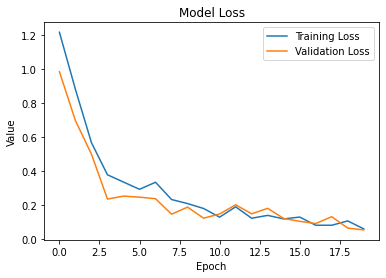

In [ ]:
#model loss train & validation
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

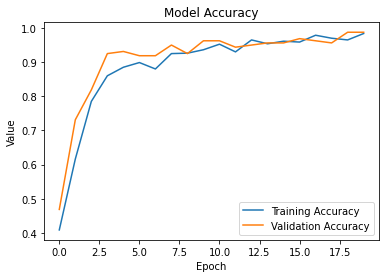

In [ ]:
#model accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving Bd18RfxcJr6O5n6j.png to Bd18RfxcJr6O5n6j.png
Bd18RfxcJr6O5n6j.png
SCISSOR


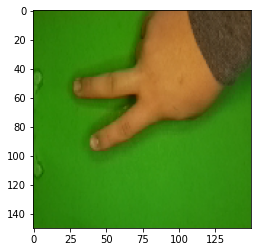

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]==1:
    print('PAPER')
  elif classes[0,1]==1:
    print('ROCK')
  elif classes [0,2]==1:
    print('SCISSOR')